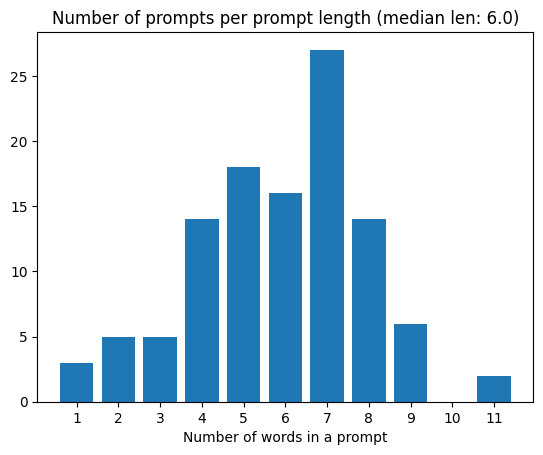

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

final_queries = pd.read_csv("../Data/Queries_IT_final.csv")

query_lengths = final_queries.query_len.value_counts().sort_index().keys().tolist()
query_len_counts = final_queries.query_len.value_counts().sort_index().values.tolist()
# print(query_lengths, query_len_counts)

fig = plt.figure()
ax = plt.bar(query_lengths, query_len_counts)
plt.xticks(list(range(min(query_lengths), max(query_lengths)+1)))
plt.xlabel("Number of words in a prompt")
plt.title("Number of prompts per prompt length (median len: " + str(round(np.median(final_queries.query_len), 2)) + ")")
plt.show()

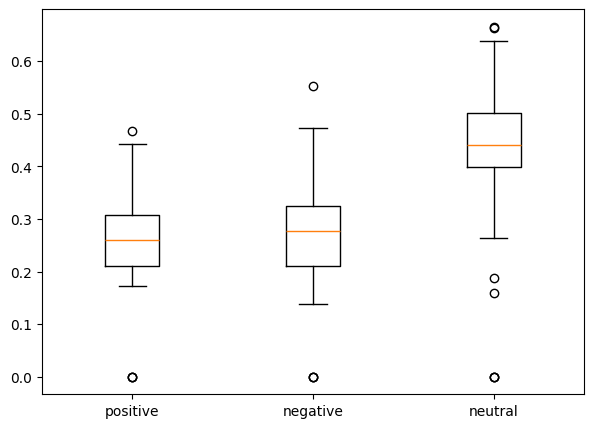

In [7]:
query_EP = pd.read_csv("../Results/query_EP.csv")

fig = plt.figure(figsize=(7,5))
ax = plt.boxplot(query_EP[["positive", "negative", "neutral"]], labels=["positive", "negative", "neutral"])
plt.show()

In [15]:
gemma_EP = pd.read_csv("../Results/gemma_EP.csv")
gpt_EP = pd.read_csv("../Results/gpt_EP.csv")
gemma_RQ_EP = pd.read_csv("../Results/gemma_RQ_EP.csv")
gpt_RQ_EP = pd.read_csv("../Results/gpt_RQ_EP.csv")

emo_features = ["positive", "negative", "neutral", "joy", "anger", "surprise", "disgust", "fear", "sadness", "trust", "expectations"]
all_EP = []

for _, row in gemma_EP.iterrows():
    for emo in emo_features:
        all_EP.append([
            row["query"],
            "OG",
            "Gemma",
            emo,
            row[emo]
        ])

for _, row in gemma_RQ_EP.iterrows():
    for emo in emo_features:
        all_EP.append([
            row["query"],
            "RQ_"+row["gender"],
            "Gemma",
            emo,
            row[emo]
        ])

for _, row in gpt_EP.iterrows():
    for emo in emo_features:
        all_EP.append([
            row["query"],
            "OG",
            "GPT",
            emo,
            row[emo]
        ])

for _, row in gpt_RQ_EP.iterrows():
    for emo in emo_features:
        all_EP.append([
            row["query"],
            "RQ_"+row["gender"],
            "GPT",
            emo,
            row[emo]
        ])

all_EP_df = pd.DataFrame(all_EP, columns=["query", "query_form", "LLM", "emo_feature_name", "emo_feature_val"])
all_EP_df.head()

,query,query_form,LLM,emo_feature_name,emo_feature_val
0,Chi era il padre di Micerino ?,OG,Gemma,positive,0.302165
1,Chi era il padre di Micerino ?,OG,Gemma,negative,0.284486
2,Chi era il padre di Micerino ?,OG,Gemma,neutral,0.413349
3,Chi era il padre di Micerino ?,OG,Gemma,joy,0.123367
4,Chi era il padre di Micerino ?,OG,Gemma,anger,0.143046


In [16]:
print(len(all_EP_df))

7260


In [14]:
all_EP_df.to_csv("../Results/all_EP.csv", index=False)

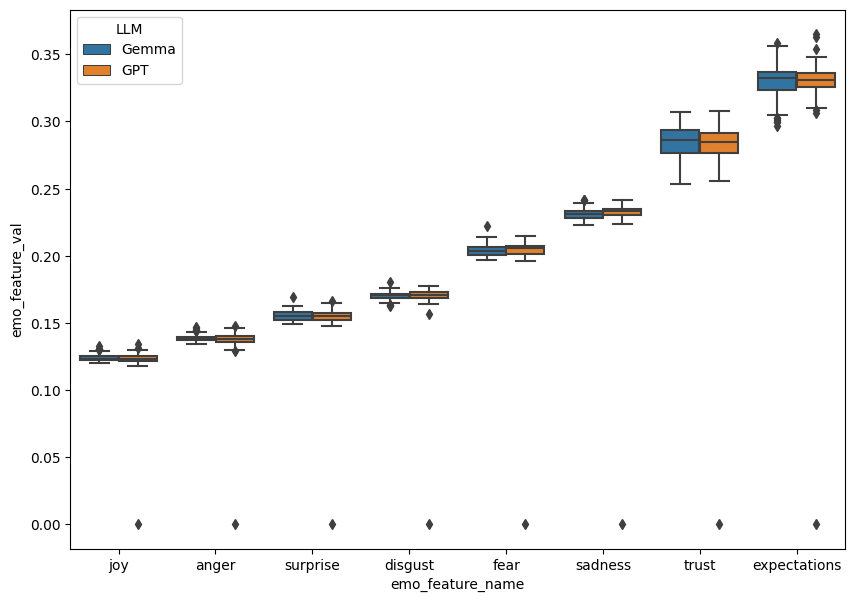

In [26]:
import seaborn as sns

OG_resp = all_EP_df.loc[(all_EP_df["query_form"]=="OG") & (all_EP_df["emo_feature_name"] != "positive") & (all_EP_df["emo_feature_name"] != "negative") & (all_EP_df["emo_feature_name"] != "neutral") ]
fig = plt.figure(figsize=(10,7))
ax = sns.boxplot(x="emo_feature_name", y="emo_feature_val", hue="LLM", data=OG_resp)
plt.show()

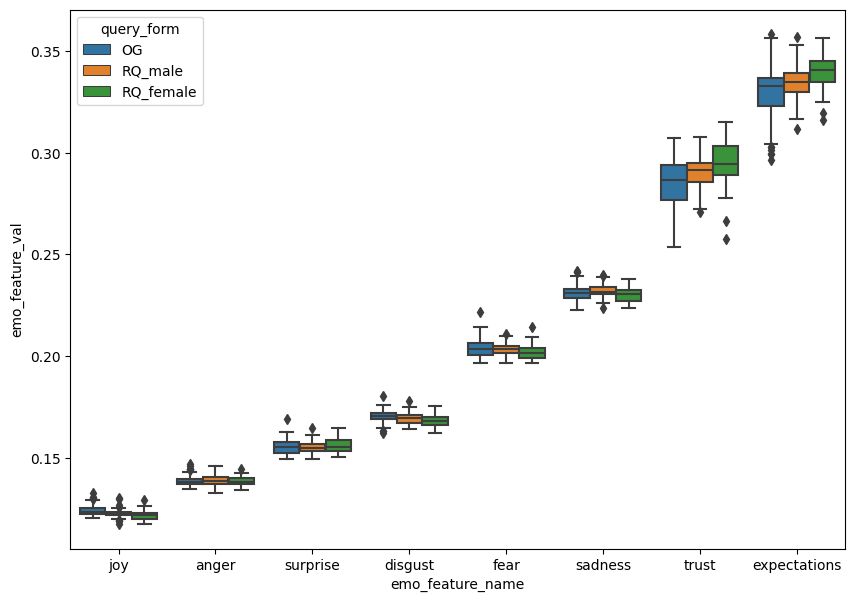

In [27]:
OG_resp = all_EP_df.loc[(all_EP_df["LLM"]=="Gemma") & (all_EP_df["emo_feature_name"] != "positive") & (all_EP_df["emo_feature_name"] != "negative") & (all_EP_df["emo_feature_name"] != "neutral") ]
fig = plt.figure(figsize=(10,7))
ax = sns.boxplot(x="emo_feature_name", y="emo_feature_val", hue="query_form", data=OG_resp)
plt.show()

C:\Users\Hrishita Chakrabarti\AppData\Local\Temp\ipykernel_39544\3659923234.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(gpt_EP.drop(columns=["query", "response", "LLM"]).columns, rotation=45)
C:\Users\Hrishita Chakrabarti\AppData\Local\Temp\ipykernel_39544\3659923234.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gpt_EP.drop(columns=["query", "response", "LLM"]).columns, rotation=45)


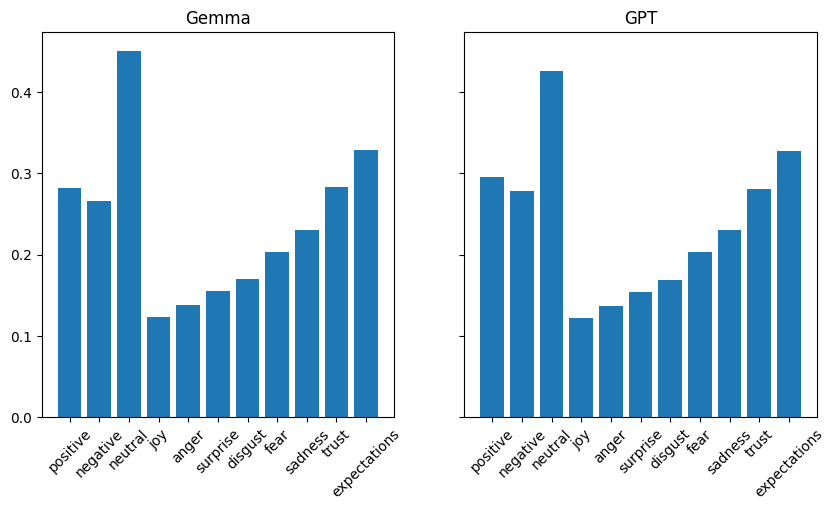

In [8]:
LLM_EP = pd.concat([gemma_EP, gpt_EP])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1.bar(height = np.average(gemma_EP.drop(columns=["query", "response", "LLM"]), axis=0), x=gemma_EP.drop(columns=["query", "response", "LLM"]).columns)
ax2.bar(height = np.average(gpt_EP.drop(columns=["query", "response", "LLM"]), axis=0), x=gpt_EP.drop(columns=["query", "response", "LLM"]).columns)
ax1.set_xticklabels(gpt_EP.drop(columns=["query", "response", "LLM"]).columns, rotation=45)
ax1.set_title("Gemma")
ax2.set_title("GPT")
ax2.set_xticklabels(gpt_EP.drop(columns=["query", "response", "LLM"]).columns, rotation=45)
# plt.title("Average values of sentiment/emotion values for LLM responses")
plt.show()

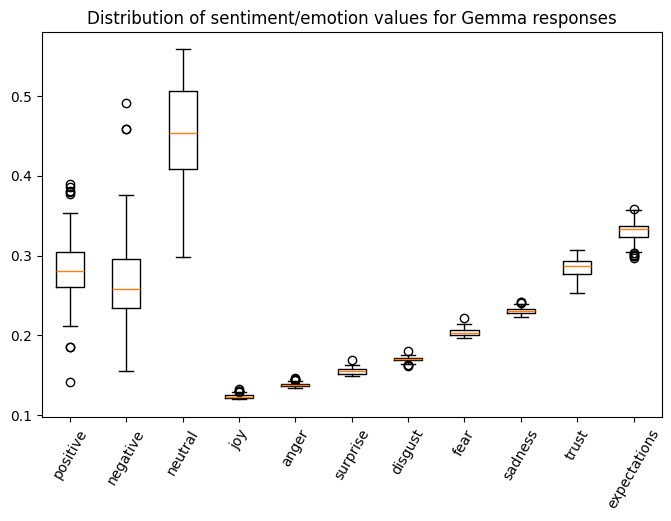

In [9]:
fig = plt.figure(figsize=(8,5))
ax = plt.boxplot(gemma_EP.drop(columns=["query", "response", "LLM"]), labels=gemma_EP.drop(columns=["query", "response", "LLM"]).columns)
plt.xticks(rotation=60)
plt.title("Distribution of sentiment/emotion values for Gemma responses")
plt.show()

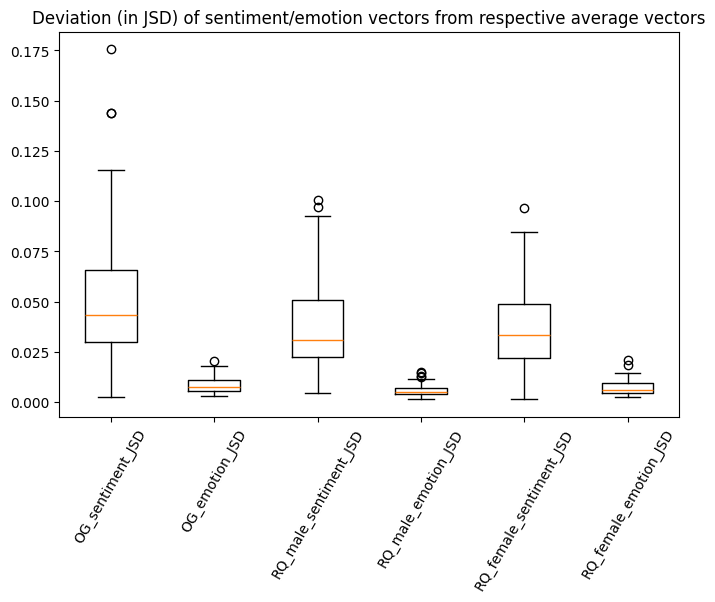

In [10]:
gemma_JSD = pd.read_csv("../Results/gemma_avg_JSD.csv")
# gemma_JSD.head()

fig = plt.figure(figsize=(8,5))
ax = plt.boxplot(gemma_JSD.drop(columns=["query"]), labels=gemma_JSD.drop(columns=["query"]).columns)
plt.xticks(rotation=60)
plt.title("Deviation (in JSD) of sentiment/emotion vectors from respective average vectors")
plt.show()
